# Wizualizacja i przetwarzanie danych - biblioteka `Matplotlib`, `plotly`, `bokeh` i `altair`
###### dr inż. Marcin Lawnik

## Widżety

**Button**

<IPython.core.display.Javascript object>


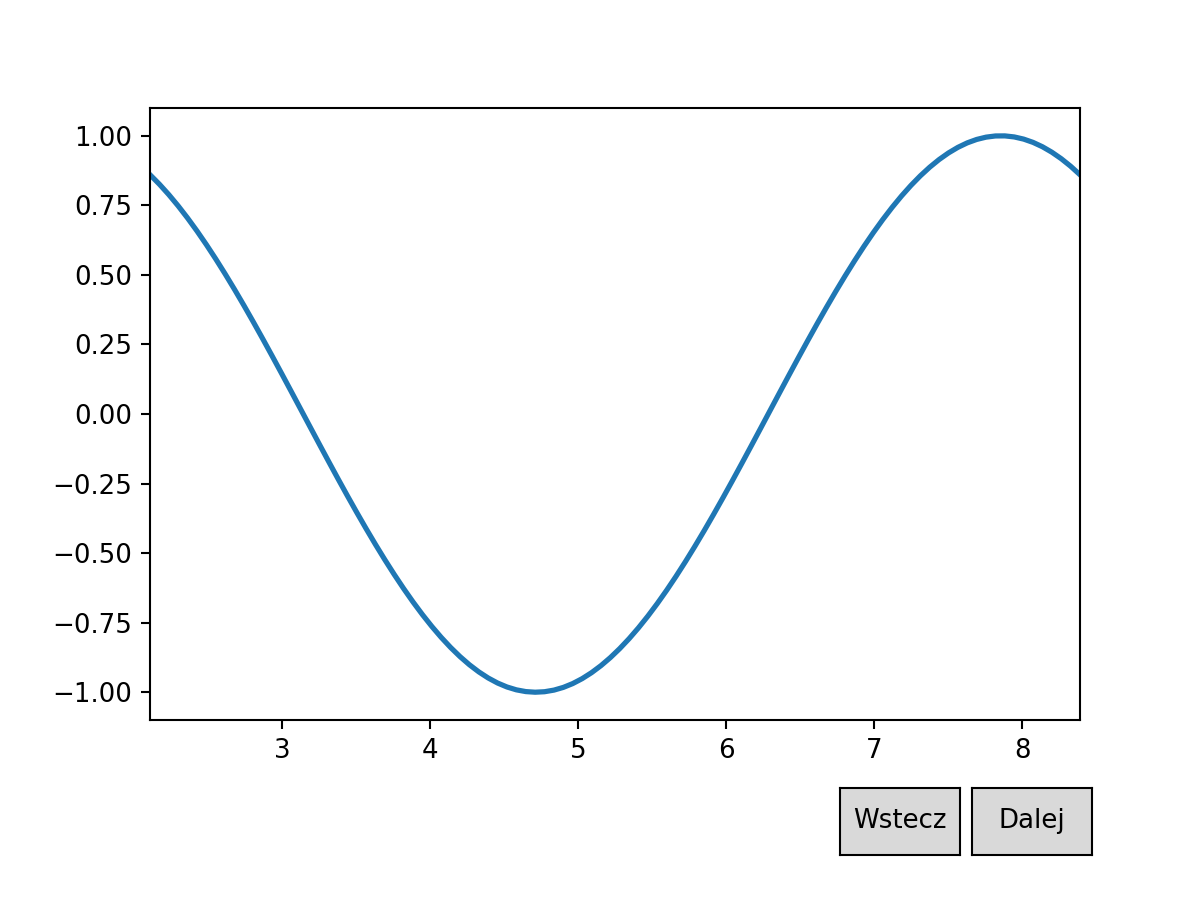

In [45]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Button

krok = 0.1
siatka = np.arange(0, 2*np.pi, krok)

fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.2)
x = np.linspace(0,2*np.pi,100)
y = np.sin(x)
l, = plt.plot(x, y, lw=2)


class Index(object):
    ind = 0

    def next(self, event):
        self.ind += 1
        i = self.ind % len(siatka)
        xdata = np.linspace(i*krok, i*krok +2*np.pi, 100)
        ydata = np.sin(xdata)
        l.set_xdata(xdata)
        l.set_ydata(ydata)
        ax.set_xlim(krok*i, krok*i +2*np.pi)
        plt.draw()

    def prev(self, event):
        self.ind -= 1
        i = self.ind % len(siatka)
        xdata = np.linspace(i*krok, i*krok +2*np.pi, 100)
        ydata = np.sin(xdata)
        l.set_xdata(xdata)
        l.set_ydata(ydata)
        ax.set_xlim(krok*i, krok*i +2*np.pi)
        plt.draw()

callback = Index()
axprev = plt.axes([0.7, 0.05, 0.1, 0.075])
axnext = plt.axes([0.81, 0.05, 0.1, 0.075])
bnext = Button(axnext, 'Dalej')
bnext.on_clicked(callback.next)
bprev = Button(axprev, 'Wstecz')
bprev.on_clicked(callback.prev)

plt.show()

**CheckButtons**

<IPython.core.display.Javascript object>


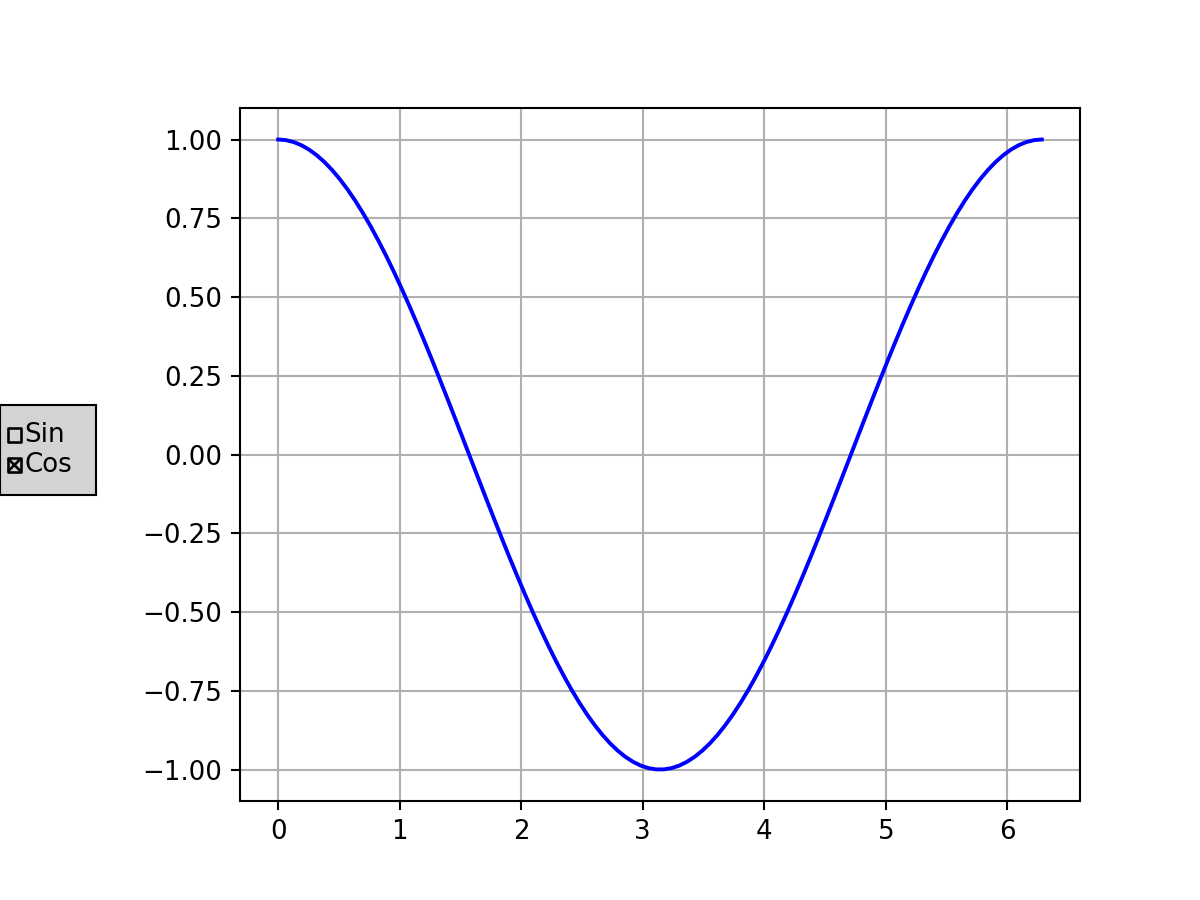

In [32]:
%matplotlib notebook
from matplotlib.widgets import CheckButtons

x = np.linspace(0,2*np.pi,100)
y1 = np.sin(x)
y2 = np.cos(x)

fig, ax = plt.subplots()

l1, = ax.plot(x, y1, 'r', visible=False)
l2, = ax.plot(x, y2, 'b')
plt.subplots_adjust(left=0.2)
plt.grid()

axcolor = 'lightgray'
rax = plt.axes([0.0, 0.45, 0.08, 0.1], facecolor=axcolor)
check = CheckButtons(rax, ('Sin', 'Cos'), (False, True))


def func(label):
    if label == 'Sin':
        l1.set_visible(not l1.get_visible())
    elif label == 'Cos':
        l2.set_visible(not l2.get_visible())
    plt.draw()
check.on_clicked(func)

plt.show()

**Radio buttons**

<IPython.core.display.Javascript object>


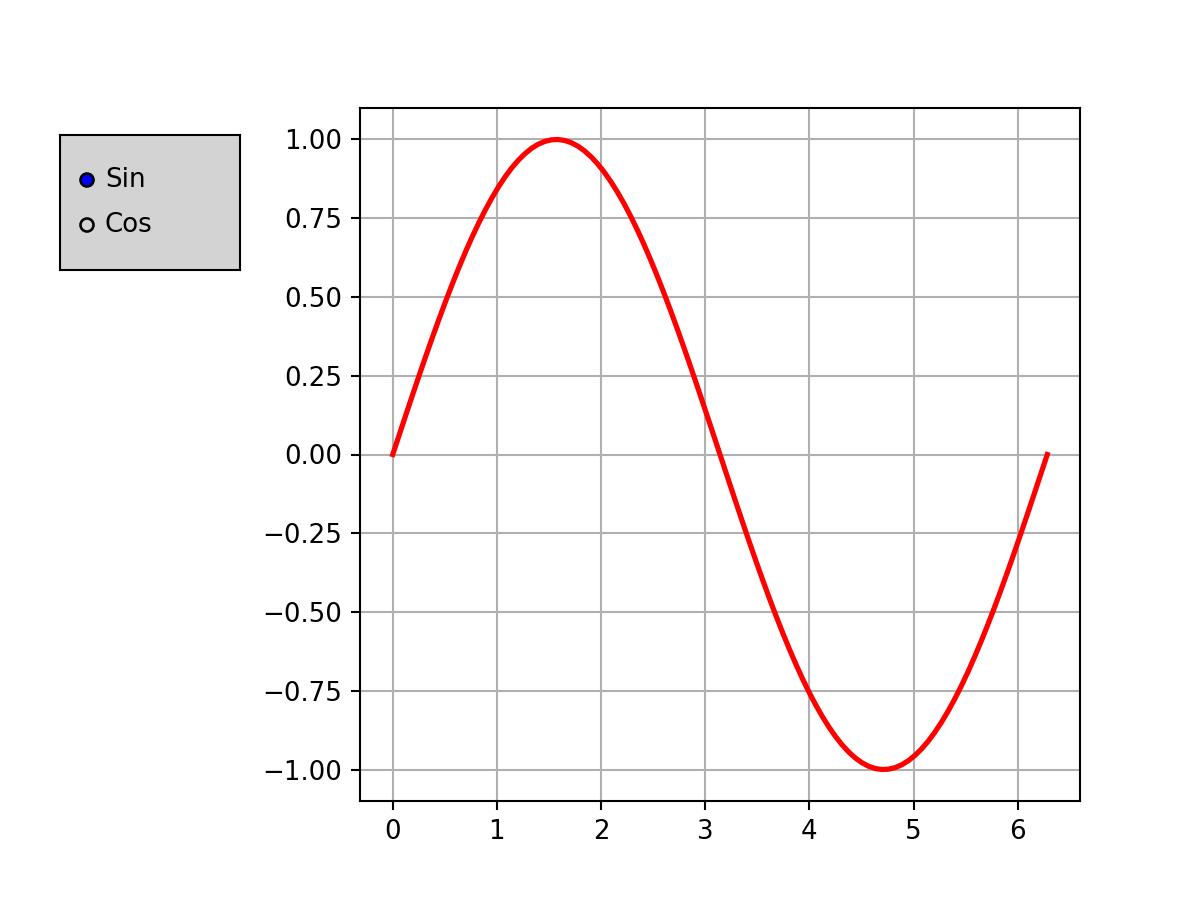

In [33]:
%matplotlib notebook
from matplotlib.widgets import RadioButtons

x = np.linspace(0,2*np.pi,100)
y1 = np.sin(x)
y2 = np.cos(x)

fig, ax = plt.subplots()
l, = ax.plot(x, y1, lw=2, color='red')
plt.subplots_adjust(left=0.3)
plt.grid()

axcolor = 'lightgray'
rax = plt.axes([0.05, 0.7, 0.15, 0.15], facecolor=axcolor)
radio = RadioButtons(rax, ('Sin', 'Cos'))


def hzfunc(label):
    hzdict = {'Sin': y1, 'Cos': y2}
    ydata = hzdict[label]
    l.set_ydata(ydata)
    plt.draw()
radio.on_clicked(hzfunc)

plt.show()

**Slider**


<IPython.core.display.Javascript object>


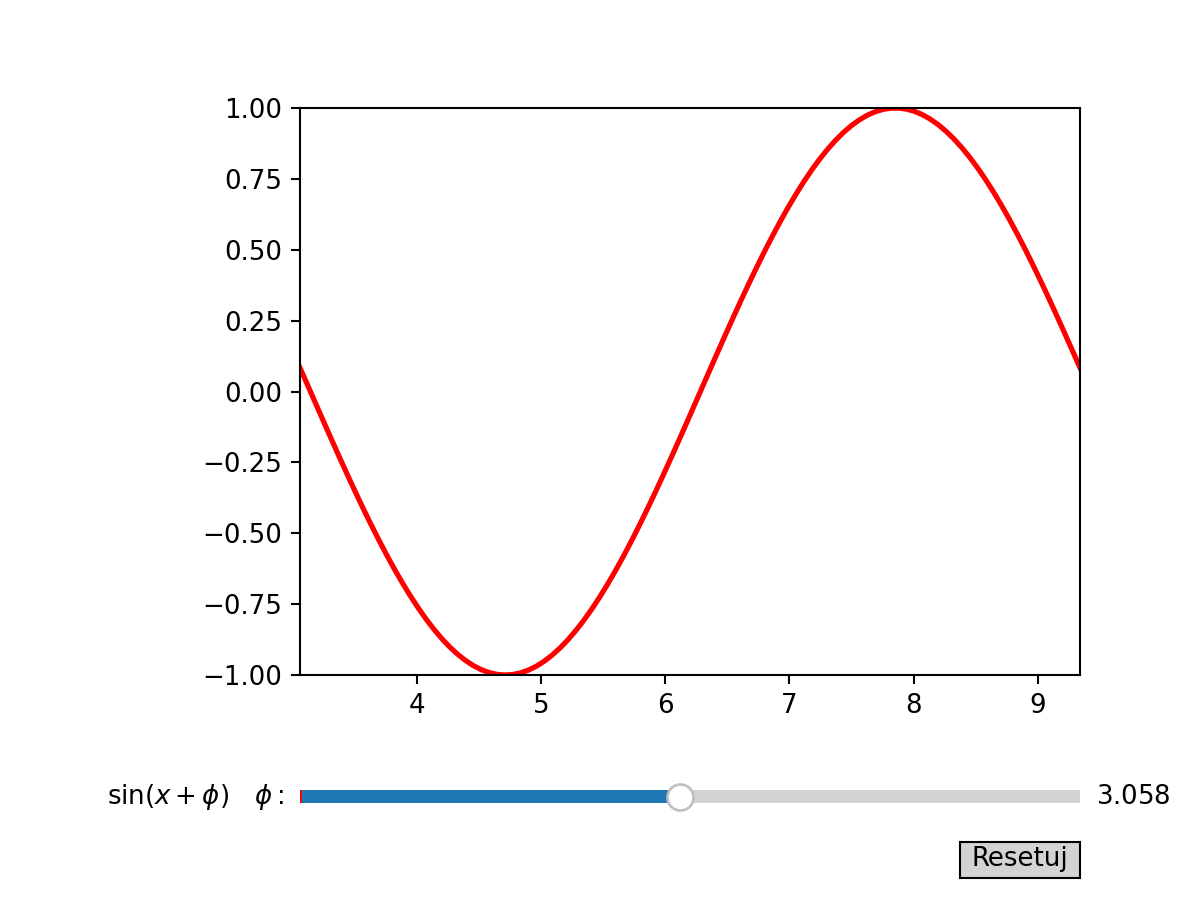

In [46]:
%matplotlib notebook
from matplotlib.widgets import Slider

fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.25)
x = np.linspace(0,2*np.pi,100)
y = np.sin(x)
phi_0 = 0.
l, = plt.plot(x, y,'r', lw=2)
plt.axis([0, 2*np.pi, -1, 1])

axcolor = 'lightgray'
axfreq = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)

przesuniecie = Slider(axfreq, '$\sin (x + \phi)\quad \phi :$', 0., 2*np.pi, valinit=phi_0)

def update(val):
    phi = przesuniecie.val
    xdata = np.linspace(phi, phi + 2*np.pi,100)
    ydata = np.sin(xdata)
    l.set_xdata(xdata)
    l.set_ydata(ydata)
    ax.set_xlim(phi, phi + 2*np.pi)
    fig.canvas.draw_idle()
przesuniecie.on_changed(update)

resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Resetuj', color=axcolor, hovercolor='0.975')

def reset(event):
    przesuniecie.reset()

button.on_clicked(reset)

plt.show()

**Span**

<IPython.core.display.Javascript object>


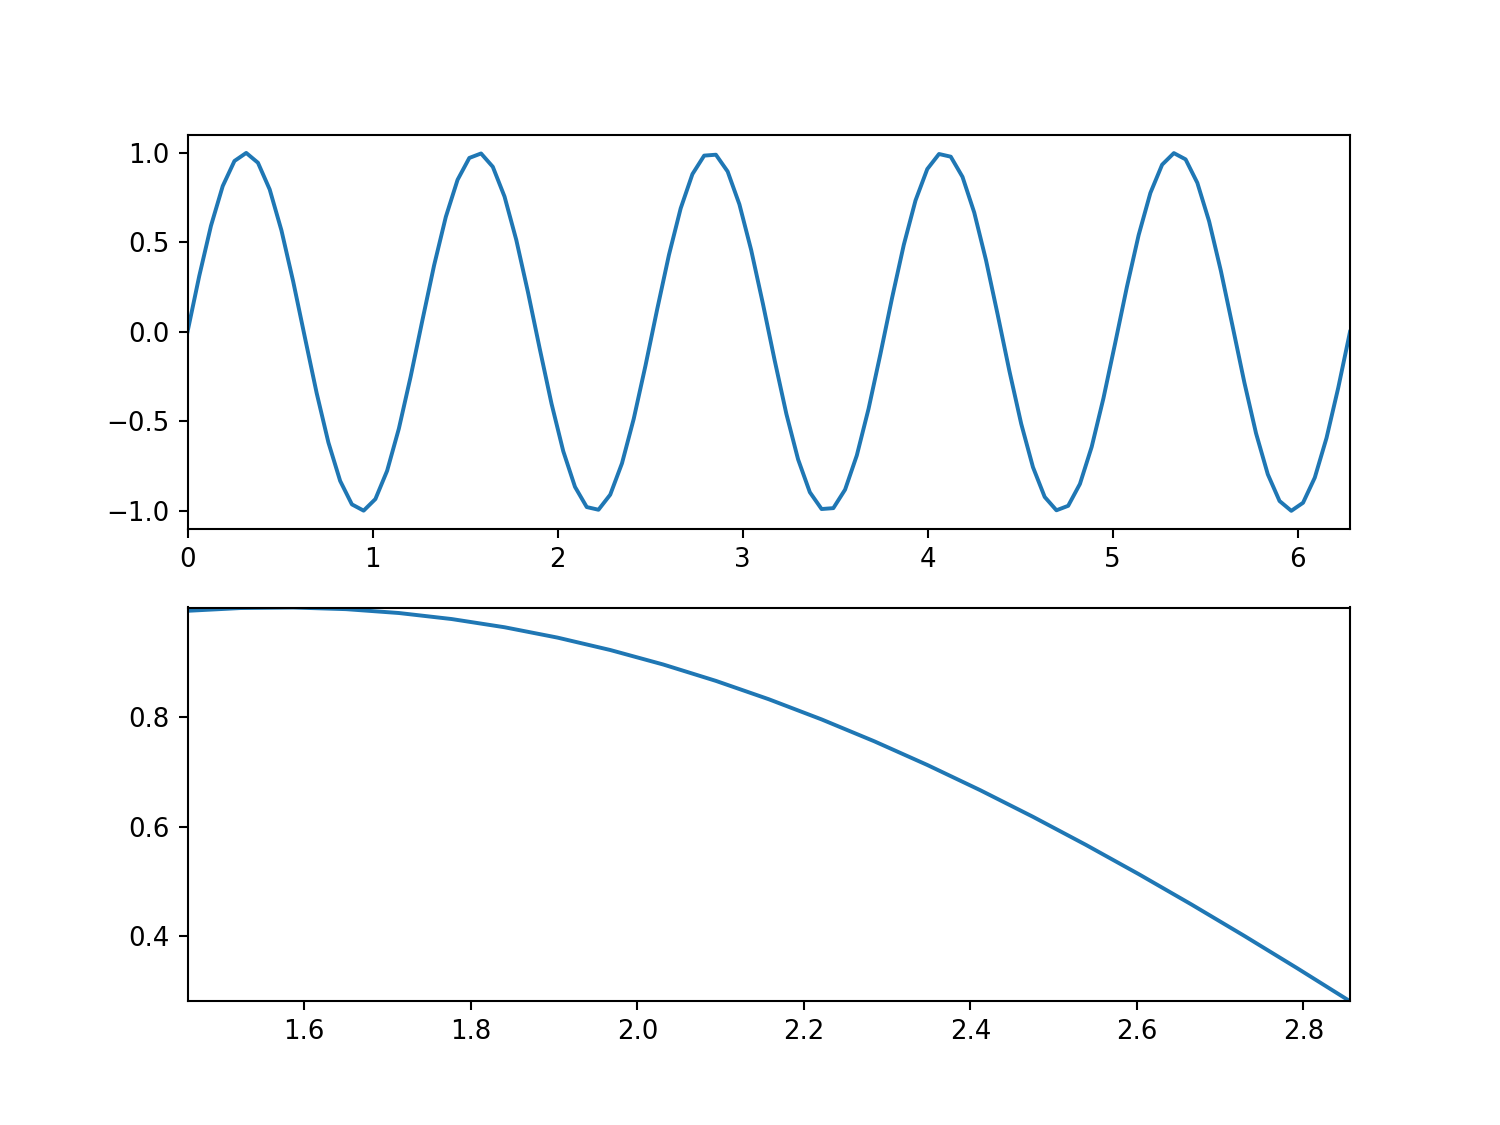

In [35]:
%matplotlib notebook
from matplotlib.widgets import SpanSelector

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(211)

x = np.linspace(0.0, 2*np.pi, 100)
y = np.sin(5*x)

ax.plot(x, y, '-')
ax.set_xlim(0, 2*np.pi)
ax.set_ylim(-1.1, 1.1)

ax2 = fig.add_subplot(212)
ax2.set_xlim(0, 2*np.pi)
line2, = ax2.plot(x, y, '-')


def onselect(xmin, xmax):
    indmin, indmax = np.searchsorted(x, (xmin, xmax))
    indmax = min(len(x) - 1, indmax)

    thisx = x[indmin:indmax]
    thisy = y[indmin:indmax]
    line2.set_data(thisx, thisy)
    ax2.set_xlim(thisx[0], thisx[-1])
    ax2.set_ylim(thisy.min(), thisy.max())
    fig.canvas.draw()

span = SpanSelector(ax, onselect, 'horizontal', useblit=True,
                    props=dict(alpha=0.5, facecolor='red'))


plt.show()

**Więcej przykładów:**

[https://matplotlib.org/examples/widgets/index.html](https://matplotlib.org/examples/widgets/index.html)


## Animacje

**1. Załaduj odpowiednie biblioteki**

In [6]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

**2. Ustaw parametry wykresu**

<IPython.core.display.Javascript object>


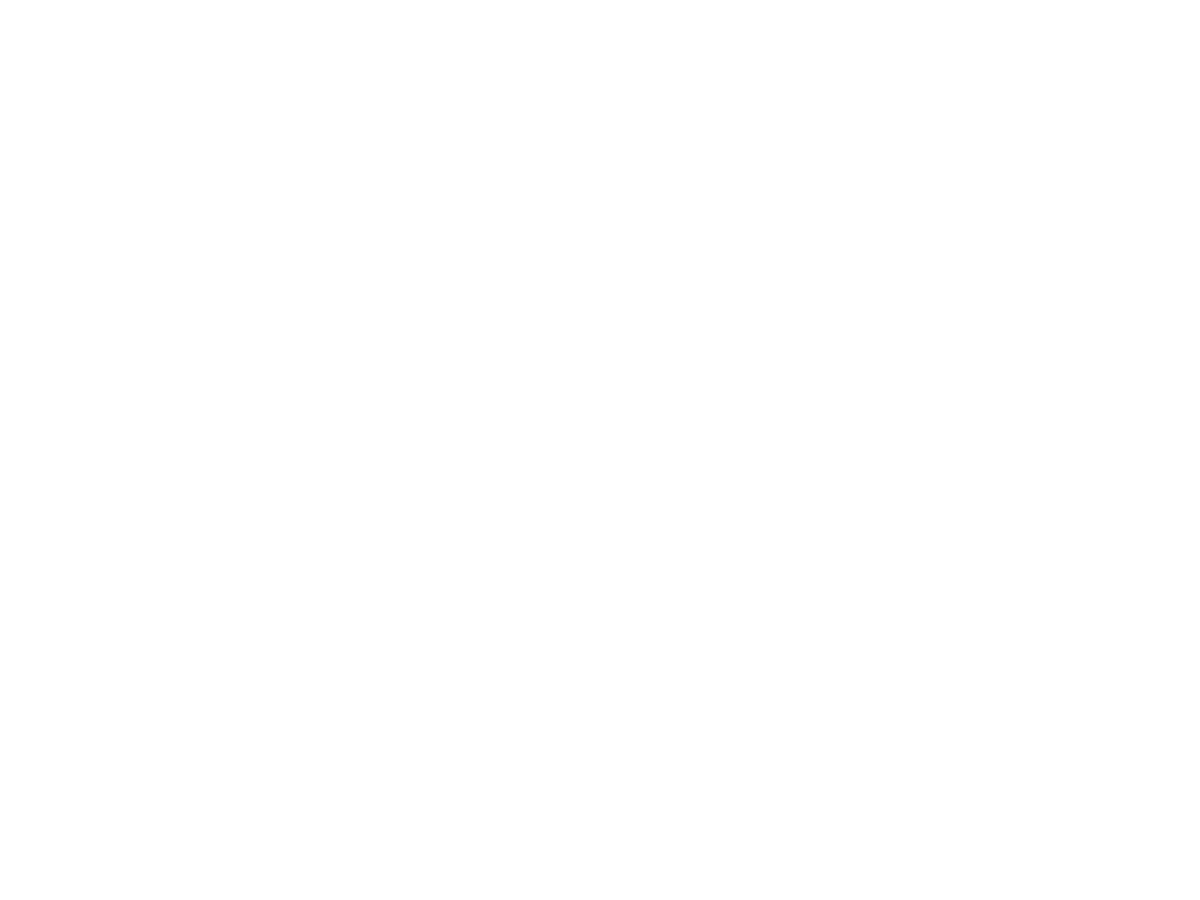

<IPython.core.display.Javascript object>


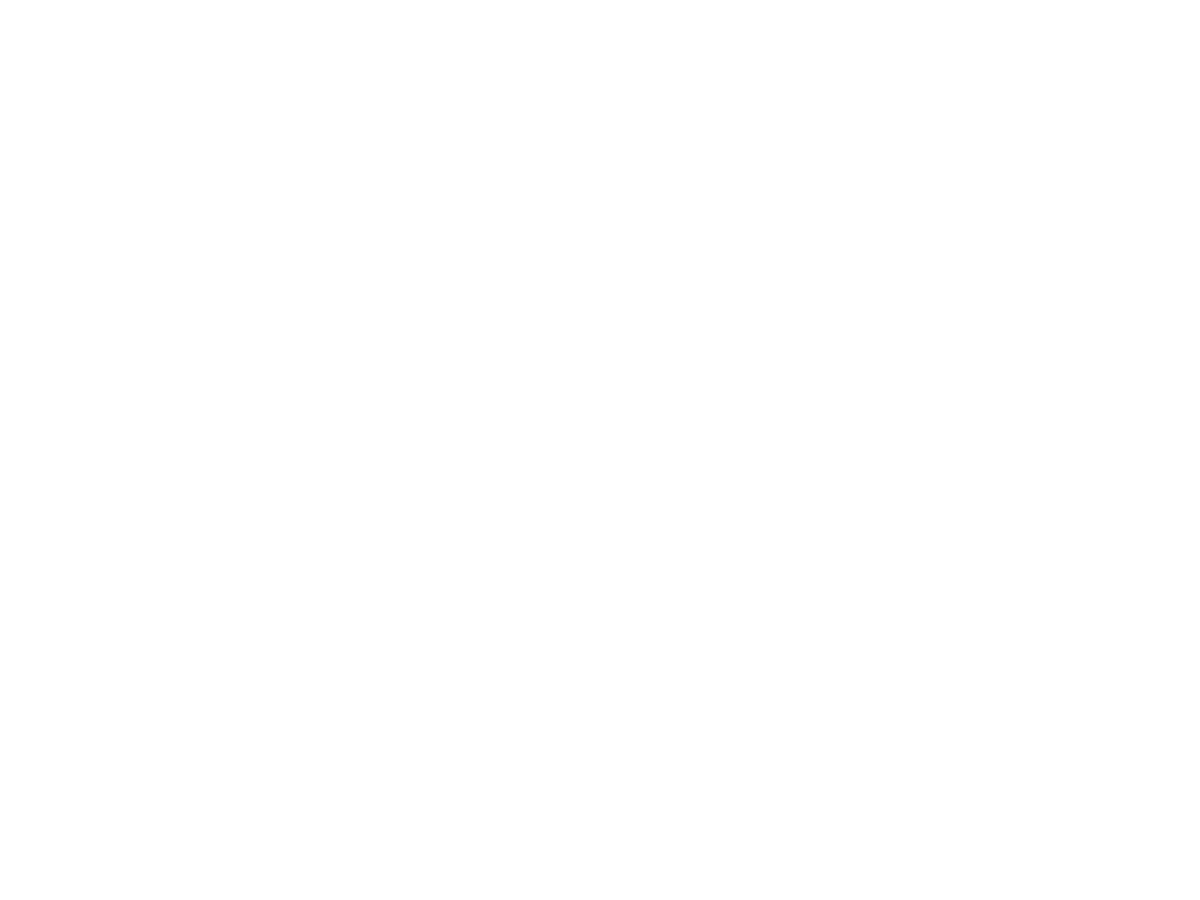

<IPython.core.display.Javascript object>


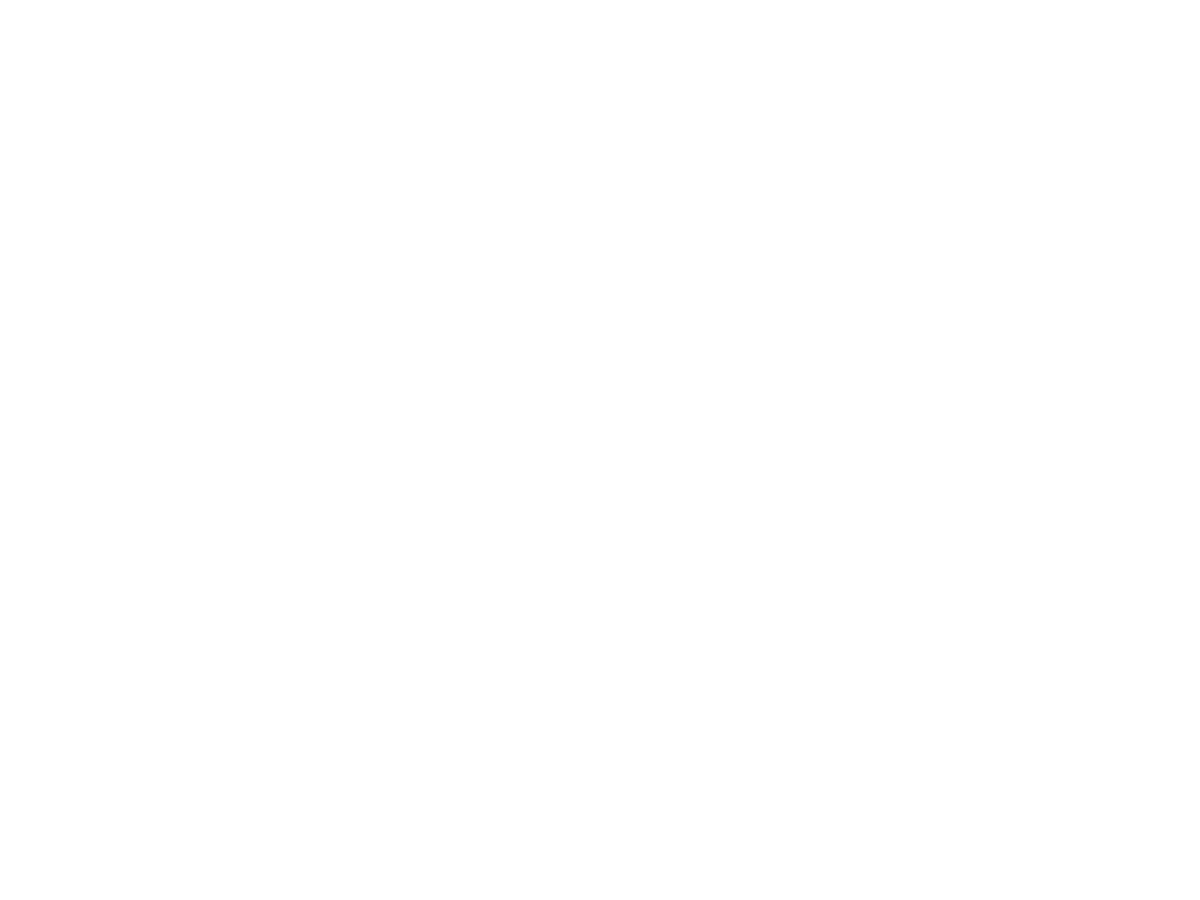

<IPython.core.display.Javascript object>


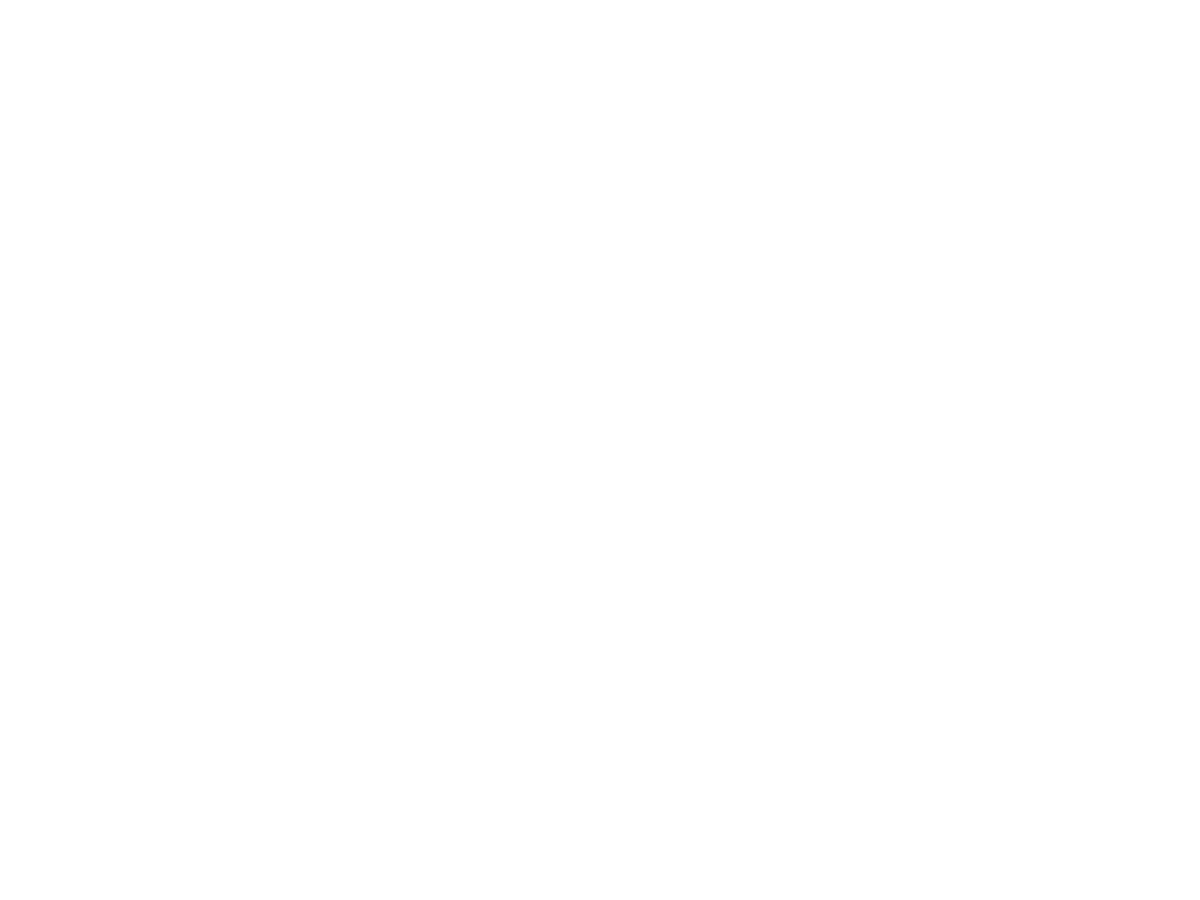

<IPython.core.display.Javascript object>


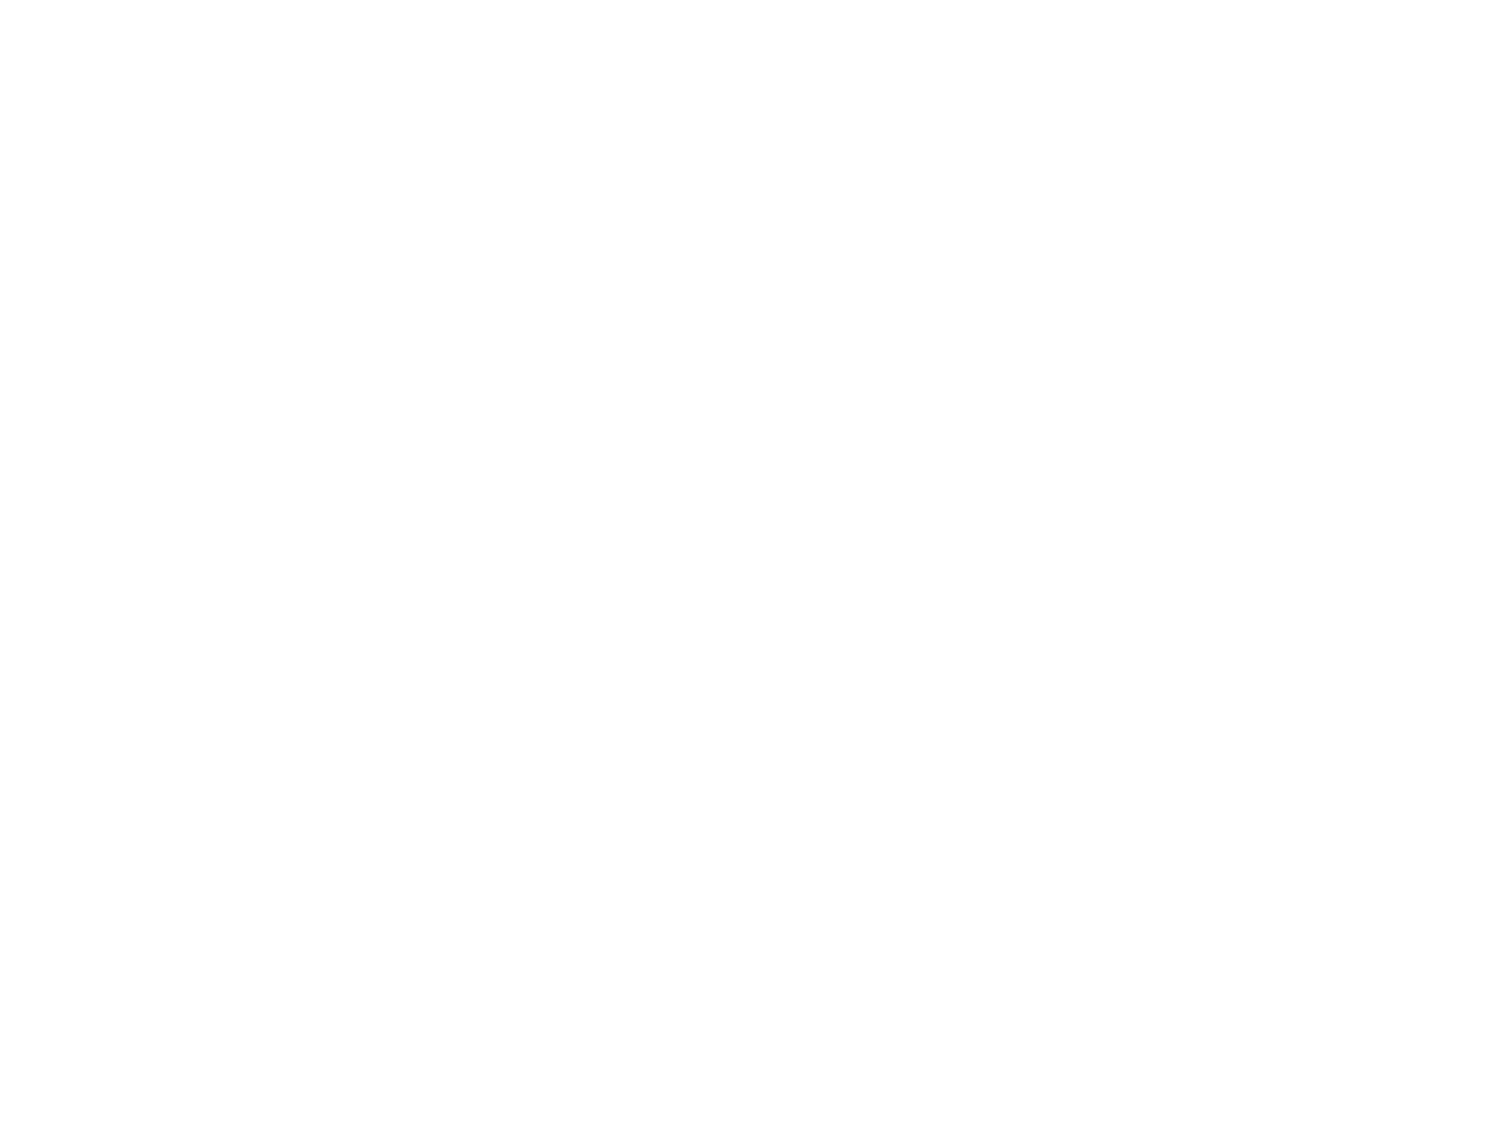

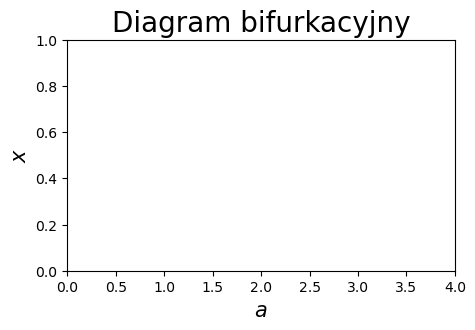

In [7]:
fig, ax = plt.subplots(figsize=(5, 3))
ax.set(xlim=(0, 4), ylim=(0, 1))
ax.set_xlabel("$a$", fontsize=15)
ax.set_ylabel("$x$", fontsize=15)
ax.set_title("Diagram bifurkacyjny", fontsize=20)

line, = ax.plot([], [], "k.", ms=0.25)

**3. Ustaw funkcję inicjującą `init`**

In [8]:
def init():
    line.set_data([], [])
    return (line,)

**4. Ustaw fukcję `animate`, która będzie wywoływana sekwencyjnie**

In [9]:
def logistyczne(x, a):
    return a*x*(1-x)

iloscIteracji = 200
x = []
y = []

def animate(i):
    temp = 0.123
    a = 0.01 * i
    for j in range(iloscIteracji):
        temp = logistyczne(temp, a)
    for j in range(iloscIteracji):
        temp = logistyczne(temp, a)
        x.append(a)
        y.append(temp)
    line.set_data(x, y)
    return (line,)

**5. Stwórz animację za pomocją funkcji `animation.FuncAnimation`**

In [10]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=401, interval=25)

In [11]:
HTML(anim.to_html5_video())

**Więcej na temat tworzenia animacji w `jupyterze` można znaleźć pod adresem**

[https://brushingupscience.wordpress.com/2016/06/21/matplotlib-animations-the-easy-way/](https://brushingupscience.wordpress.com/2016/06/21/matplotlib-animations-the-easy-way/)

**Uwaga**

W przypadku błędu `"RuntimeError: No MovieWriters available!"` lub `Requested MovieWriter (ffmpeg) not available`

należy zainstalować pakiet `ffmpeg `

```
conda install -c conda-forge ffmpeg
```

# Biblioteka `plotly`

### Plotly

[https://plotly.com/python/](https://plotly.com/python/)

### Pierwsze kroki

[https://plot.ly/python/getting-started/](https://plot.ly/python/getting-started/)

##### Instalacja

`conda install -c plotly plotly=4.14.3`

### Tutorial

[https://plot.ly/python/creating-and-updating-figures/](https://plot.ly/python/creating-and-updating-figures/)

### Szybka ściąga

[https://images.plot.ly/plotly-documentation/images/python_cheat_sheet.pdf](https://images.plot.ly/plotly-documentation/images/python_cheat_sheet.pdf)

In [12]:
import plotly.io as pio

fig = {
    "data": [{"type": "scatter",
              "x": [1, 2, 3],
              "y": [1, 2, 3]}],
    "layout": {"title": {"text": "Wykres liniowy"}}
}

pio.show(fig)

In [13]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Scatter(x=[1, 2 ,3], y=[1, 2, 3]))
fig.show()

In [14]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Scatter(x=[1, 2 ,3], y=[1, 2, 3], name="dane 1"), 
                      go.Scatter(x=[1, 2 ,3], y=[3, 2, 1], name="dane 2")])
fig.show()

In [15]:
from plotly.subplots import make_subplots
import numpy as np

x = np.linspace(0,2*np.pi,100)

y1 = np.sin(x)
y2 = np.cos(x)

fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Scatter(x=x, y=y1, mode="lines", name="sin"), row=1, col=1)
fig.add_trace(go.Scatter(x=x, y=y2, mode="lines", name="cos"), row=1, col=2)
fig.show()

In [36]:
import plotly.graph_objects as go

labels = 'A', 'B', 'C', 'D'
wyniki = [22, 2, 20,  1]

fig = go.Figure(data=go.Pie(labels=labels, values=wyniki))
fig.show()

In [37]:
import plotly.graph_objects as go

komitety = ['A', 'B', 'C', 'D', 'E']
wyniki = [22, 2, 20,  1]

fig = go.Figure(data=go.Bar(x=komitety, y=wyniki))
fig.show()

### Z `matplotlib` do `plotly`

In [18]:
import plotly.tools as tls
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,2*np.pi, 100) 
y1 = np.sin(x)
y2 = np.cos(x)

fig, axes = plt.subplots(2,1, figsize = (10,6))
axes[0].plot(x,y1, label = '$\sin x$')
axes[0].set_xlabel(r"$\sin x$")
axes[1].plot(x,y2, label = '$\cos x$')
axes[1].set_xlabel("'$\cos x$'")

fig.tight_layout()


plotly_fig = tls.mpl_to_plotly(fig)  
iplot(plotly_fig)

### `matplotlib` czy `plotly`?

[https://www.activestate.com/blog/plotting-data-in-python-matplotlib-vs-plotly/](https://www.activestate.com/blog/plotting-data-in-python-matplotlib-vs-plotly/)

# Biblioteka `Bokeh`

[https://docs.bokeh.org/en/latest/](https://docs.bokeh.org/en/latest/)

### instalacja

```conda install -c anaconda bokeh```

### Tutorial
[https://mybinder.org/v2/gh/bokeh/bokeh-notebooks/master?filepath=tutorial%2F00%20-%20Introduction%20and%20Setup.ipynb](https://mybinder.org/v2/gh/bokeh/bokeh-notebooks/master?filepath=tutorial%2F00%20-%20Introduction%20and%20Setup.ipynb)

### Kilka przykładów

**Sinus**

In [19]:
from bokeh.plotting import figure, output_file, show
import bokeh

x = np.linspace(0,2*np.pi, 100)
y = np.sin(x)

output_file("sinus.html")

p = figure(title="sinus", x_axis_label='x', y_axis_label='sin x')

p.line(x, y,  line_width=2)

show(p)


In [20]:
x = np.linspace(0,2*np.pi, 100)
y = np.sin(x)

output_file("sinus.html")

p = figure(title="sinus", x_axis_label='x', y_axis_label='sin x')

p.line(x, y,  line_width=2)

bokeh.io.reset_output()
bokeh.io.output_notebook()

show(p)

Loading BokehJS ...

**Sinus i Cosinus**

In [21]:
from bokeh.plotting import figure, output_file, show


x = np.linspace(0,2*np.pi, 10)
y_s = np.sin(x)
y_c = np.cos(x)

# output_file("sin_i_cos.html")

p = figure(
   tools="pan,box_zoom,reset,save",
   x_range=[0,2*np.pi], y_range=[-1, 1], title="przybliżenie sinus i cosinus",
   x_axis_label='x', y_axis_label='f(x)'
)

p.circle(x, y_s, legend_label="sinus", fill_color="red", line_color="red", size=6)
p.line(x, y_s, legend_label="sinus", line_color="red", line_width=3)
p.line(x, y_c, legend_label="cosinus", line_color="orange", line_dash="4 4", line_width=3)

show(p)

**Funkcje potęgowe**

In [38]:
from ipywidgets import interact
import numpy as np

from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure

output_notebook()

# output_file("f_potegowe.html")

x = np.linspace(-1, 1, 100)
y = x


p = figure(title="Funkcje potęgowe", height=300, width=300, y_range=(-1,1),
           background_fill_color='#efefef')
r = p.line(x, y, color="red", line_width=2)

def update(f):
    if   f == "x": 
        r.data_source.data['y'] = x
    elif f == "x^2": 
        r.data_source.data['y'] = x**2
    elif f == "x^3": 
        r.data_source.data['y'] = x**3
    elif f == "x^4": 
        r.data_source.data['y'] = x**4
    push_notebook()
    
show(p,notebook_handle=True)

interact(update, f=["x", "x^2","x^3","x^4"])

Loading BokehJS ...

interactive(children=(Dropdown(description='f', options=('x', 'x^2', 'x^3', 'x^4'), value='x'), Output()), _do…

<function __main__.update(f)>

**Funkcja kwadratowa**

In [39]:
from ipywidgets import interact
import numpy as np

from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure

# output_notebook()

# output_file("f_kwadratowa.html")

x = np.linspace(-5, 5, 100)
y = x


p = figure(title="Funkcja kwadratowa", height=300, width=300, y_range=(-5,5),
           background_fill_color='#efefef')
r = p.line(x, y, color="red", line_width=2)

def update(a=1,b=1,c=1):
    r.data_source.data['y'] = a*x**2+b*x+c
    push_notebook()
    
show(p,notebook_handle=True)

interact(update, a=(-2,2,0.1), b=(-2,2,0.1), c=(-2,2,0.1))

interactive(children=(FloatSlider(value=1.0, description='a', max=2.0, min=-2.0), FloatSlider(value=1.0, descr…

<function __main__.update(a=1, b=1, c=1)>

# Altair

**Altair** to deklaratywna biblioteka do wizualizacji statystycznych w Pythonie. Obudowuje ona narzędzie [Vega](https://vega.github.io/) i w bardzo łatwy sposób pozwala na tworzenie skomplikowanych statystycznych wizualizacji w bardzo szybkim czasie.

[https://altair-viz.github.io/](https://altair-viz.github.io/)

**Instalacja**

``` 
conda install -c anaconda vega_datasets
```

In [24]:
import altair as alt
import pandas as pd
import numpy as np
from vega_datasets import data

**Kilka przykładów**

Altair dostarcza nam wiele podstawowych typów zaznaczania na wykresach.

<table class="docutils align-default">
<colgroup>
<col style="width: 8%" />
<col style="width: 22%" />
<col style="width: 40%" />
</colgroup>
<thead>
<tr class="row-odd"><th class="head"><p>Mark Name</p></th>
<th class="head"><p>Method</p></th>
<th class="head"><p>Description</p></th>
</tr>
</thead>
<tbody>
<tr class="row-even"><td><p>arc</p></td>
<td><p><code class="xref py py-meth docutils literal notranslate"><span class="pre">mark_arc()</span></code></p></td>
<td><p>A pie chart</p></td>

</tr>
<tr class="row-odd"><td><p>area</p></td>
<td><p><code class="xref py py-meth docutils literal notranslate"><span class="pre">mark_area()</span></code></p></td>
<td><p>A filled area plot</p></td>

</tr>
<tr class="row-even"><td><p>bar</p></td>
<td><p><code class="xref py py-meth docutils literal notranslate"><span class="pre">mark_bar()</span></code></p></td>
<td><p>A bar plot</p></td>

</tr>
<tr class="row-odd"><td><p>circle</p></td>
<td><p><code class="xref py py-meth docutils literal notranslate"><span class="pre">mark_circle()</span></code></p></td>
<td><p>A scatter plot with filled circles</p></td>

</tr>
<tr class="row-even"><td><p>geoshape</p></td>
<td><p><code class="xref py py-meth docutils literal notranslate"><span class="pre">mark_geoshape()</span></code></p></td>
<td><p>A geographic shape</p></td>

</tr>
<tr class="row-odd"><td><p>image</p></td>
<td><p><code class="xref py py-meth docutils literal notranslate"><span class="pre">mark_image()</span></code></p></td>
<td><p>A scatter plot with image markers</p></td>

</tr>
<tr class="row-even"><td><p>line</p></td>
<td><p><code class="xref py py-meth docutils literal notranslate"><span class="pre">mark_line()</span></code></p></td>
<td><p>A line plot</p></td>

</tr>
<tr class="row-odd"><td><p>point</p></td>
<td><p><code class="xref py py-meth docutils literal notranslate"><span class="pre">mark_point()</span></code></p></td>
<td><p>A scatter plot with configurable point shapes</p></td>

</tr>
<tr class="row-even"><td><p>rect</p></td>
<td><p><code class="xref py py-meth docutils literal notranslate"><span class="pre">mark_rect()</span></code></p></td>
<td><p>A filled rectangle, used for heatmaps</p></td>

</tr>
<tr class="row-odd"><td><p>rule</p></td>
<td><p><code class="xref py py-meth docutils literal notranslate"><span class="pre">mark_rule()</span></code></p></td>
<td><p>A vertical or horizontal line spanning the axis</p></td>

</tr>
<tr class="row-even"><td><p>square</p></td>
<td><p><code class="xref py py-meth docutils literal notranslate"><span class="pre">mark_square()</span></code></p></td>
<td><p>A scatter plot with filled squares</p></td>

</tr>
<tr class="row-odd"><td><p>text</p></td>
<td><p><code class="xref py py-meth docutils literal notranslate"><span class="pre">mark_text()</span></code></p></td>
<td><p>A scatter plot with points represented by text</p></td>

</tr>
<tr class="row-even"><td><p>tick</p></td>
<td><p><code class="xref py py-meth docutils literal notranslate"><span class="pre">mark_tick()</span></code></p></td>
<td><p>A vertical or horizontal tick mark</p></td>

</tr>
<tr class="row-odd"><td><p>trail</p></td>
<td><p><code class="xref py py-meth docutils literal notranslate"><span class="pre">mark_trail()</span></code></p></td>
<td><p>A line with variable widths</p></td>

</tr>
</tbody>
</table>

In [42]:
cars = data.cars()

alt.Chart(cars).mark_point().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin',
).interactive()

alt.Chart(...)

In [43]:
cars = data.cars()

alt.Chart(cars).mark_point().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin',
    shape='Origin'
)

alt.Chart(...)

In [27]:
url = data.cars.url

alt.Chart(url).mark_circle(
    color='red',
    opacity=0.3
).encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q'
)

alt.Chart(...)

In [44]:
chart_data = pd.DataFrame({'x': ['A', 'B', 'C', 'D', 'E'], 'y': [5, 3, 6, 7, 2]})
alt.Chart(chart_data).mark_bar().encode(x='x', y='y')

alt.Chart(...)

In [29]:
source = data.population.url

alt.Chart(source).mark_boxplot().encode(
    x='age:O',
    y='people:Q'
)

alt.Chart(...)

In [30]:
iris = data.iris.url

chart1 = alt.Chart(iris).mark_point().encode(
    x='petalLength:Q',
    y='petalWidth:Q',
    color='species:N'
).properties(
    height=300,
    width=300
)

chart2 = alt.Chart(iris).mark_bar().encode(
    x='count()',
    y=alt.Y('petalWidth:Q', bin=alt.Bin(maxbins=30)),
    color='species:N'
).properties(
    height=300,
    width=100
)

chart1 | chart2

alt.HConcatChart(...)

### Dziękuję za uwagę